<a href="https://colab.research.google.com/github/codelalala/nlp/blob/main/detr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import torch as th
import requests
from PIL import Image,ImageDraw,ImageFont
import torchvision.transforms as T
import collections

In [4]:
model=th.hub.load('facebookresearch/detr','detr_resnet101',pretrained=True)
model.eval()
model=model.cuda()

Downloading: "https://github.com/facebookresearch/detr/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


Downloading: "https://dl.fbaipublicfiles.com/detr/detr-r101-2c7b67e5.pth" to /root/.cache/torch/hub/checkpoints/detr-r101-2c7b67e5.pth


In [5]:
model

DETR(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=256, bias=True)
          (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
        (1): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_f

In [6]:
transform=T.Compose([
                     T.Resize(800),
                     T.ToTensor(),
                     T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])#mean,std
])
# COCO classes
CLASSES = [
    'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
    'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

In [8]:
url='https://media-cldnry.s-nbcnews.com/image/upload/newscms/2020_28/1587661/dogs-age-years-kb-inline-200707.jpg'

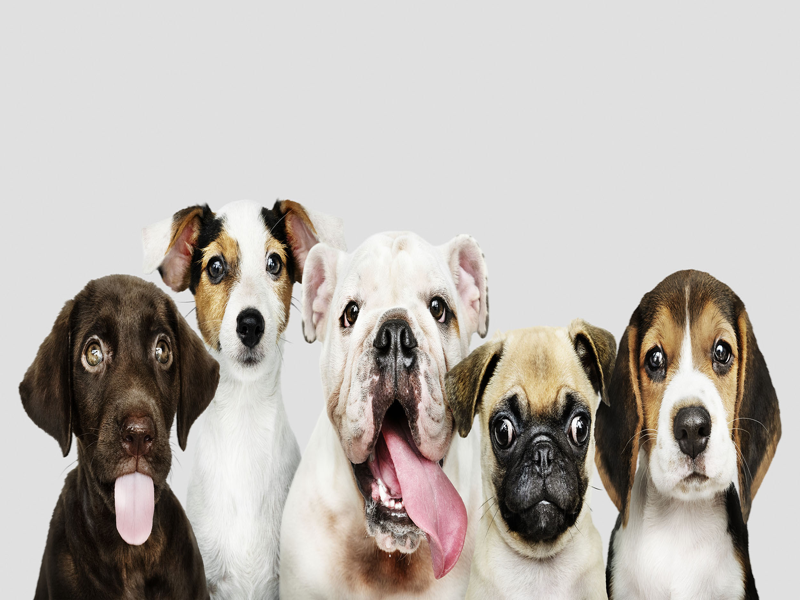

In [9]:
img=Image.open(requests.get(url,stream=True).raw).resize((800,600))
img

In [10]:
img_tens=transform(img).unsqueeze(0).cuda()

In [11]:
with th.no_grad():
    output=model(img_tens)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


In [15]:
output['pred_boxes'][0].shape

torch.Size([100, 4])

In [16]:
output['pred_logits'][0].shape

torch.Size([100, 92])

In [17]:
len(CLASSES)

91

In [18]:
output['pred_logits'][0].argmax(-1)

tensor([91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
        91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
        91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 18, 91, 91, 91, 91, 91, 91,
        91, 91, 18, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 18, 91, 91, 18,
        91, 91, 91, 91, 91, 91, 91, 18, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
        91, 91, 18, 91, 91, 91, 91, 91, 91, 91], device='cuda:0')

Counter({'dog': 6})


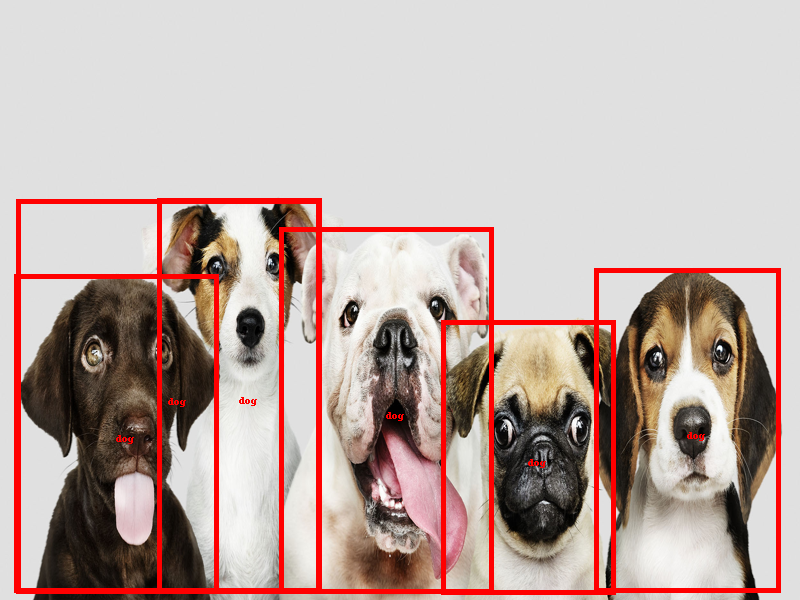

In [45]:
img2=img.copy()
drw=ImageDraw.Draw(img2)
counter=collections.Counter()
for logits,box in zip(output['pred_logits'][0],output['pred_boxes'][0]):
    cls=logits.argmax()
    if cls>=len(CLASSES):
        continue
    counter[label]+=1
    label=CLASSES[cls]
    box=box.cpu()*th.Tensor([800,600,800,600])
    x,y,w,h=box
    x0,x1=x-w//2,x+w//2
    y0,y1=y-h//2,y+h//2
    drw.rectangle([x0,y0,x1,y1],outline='red',width=5)
    drw.text((x,y),label,fill='red')
print(counter)
    
img2